Boston Housing Price Prediction  
### A Beginner-Friendly Machine Learning Project for Real Estate Price Estimation  

This project focuses on predicting housing prices using the **Boston Housing Dataset**,
It includes **exploratory data analysis (EDA)**, multiple **machine learning models**, and a comparison of their performance.

## Project Objectives

- Understand the relationship between housing-related features and property prices  
- Apply exploratory data analysis and visualize key patterns  
- Build and compare multiple regression models  
- Evaluate models using RMSE, MAE, and R²  
- Identify the best-performing model  
- Visualize predictions vs actual values  
- Generate feature importance for interpretability  

---

## Project Structure (Notebook Blocks)

### **Block 1 — Import Libraries**  
Load all essential libraries for data manipulation, visualization, and modeling.

### **Block 2 — Load Dataset**  
Automatically detects `boston.csv` in Kaggle’s `/kaggle/input/` directory.

### **Block 3 — Basic Data Exploration**  
- Data types  
- Missing values  
- Statistical summary  

### **Block 4 — Target Variable Analysis (MEDV)**  
Plot the distribution and outliers of the housing price variable.

### **Block 5 — Correlation Analysis + Scatter Plots**  
Identify strongest predictors:  
- `LSTAT`  
- `RM`  
- `PTRATIO`  

Includes correlation heatmap & scatter relationships.

### **Block 6 — Train-Test Split**  
Split dataset into training (80%) and testing (20%).

### **Block 7 — Define Machine Learning Models**  
Models used:
- Linear Regression  
- Ridge Regression  
- Random Forest  
- Gradient Boosting  
- XGBoost  

### **Block 8 — Train Models + Evaluate Performance**  
Compute and compare:
- RMSE  
- MAE  
- R²  

Results are sorted and shown in a clean table.

### **Block 9 — Cross-Validation**  
Apply 5-fold cross-validation to the best model.

### **Block 10 — Feature Importance**  
Visualize which variables most influence housing prices (tree-based models).

### **Block 11 — Actual vs Predicted Plot**  
Scatter plot comparing actual and predicted values.

---

##  Machine Learning Models Tested

| Model                | Type                |
|---------------------|---------------------|
| Linear Regression   | Basic baseline      |
| Ridge Regression    | Regularized model   |
| Random Forest       | Ensemble (bagging)  |
| Gradient Boosting   | Ensemble (boosting) |
| XGBoost             | Advanced boosting   |

---

##  Best Performing Model

The best model is selected based on the **lowest RMSE** and **highest R²**.  
Typically, **XGBoost** or **Gradient Boosting Regression** achieves the highest accuracy.

---

##  Evaluation Metrics

- **RMSE (Root Mean Squared Error)**  
- **MAE (Mean Absolute Error)**  
- **R² (Coefficient of Determination)**  

These metrics help compare model accuracy and generalization power.

---

##  Key Insights

- `LSTAT` (lower-income population %) is **strongly negatively correlated** with housing prices.  
- `RM` (average rooms per house) has a **strong positive correlation** with price.  
- Ensemble models significantly outperform linear models.  


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [3]:

# Import Libraries


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import xgboost as xgb

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:

#Load Dataset


import pathlib

# Kaggle stores uploaded datasets under /kaggle/input/
data_paths = list(pathlib.Path("/kaggle/input").rglob("boston.csv"))

if len(data_paths) > 0:
    data_path = data_paths[0]
else:
    data_path = "boston.csv"  # fallback for local testing

df = pd.read_csv(data_path)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
#Basic Data Exploration

print("\nColumn Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isna().sum())

print("\nStatistical Summary:")
df.describe()



Column Types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Statistical Summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


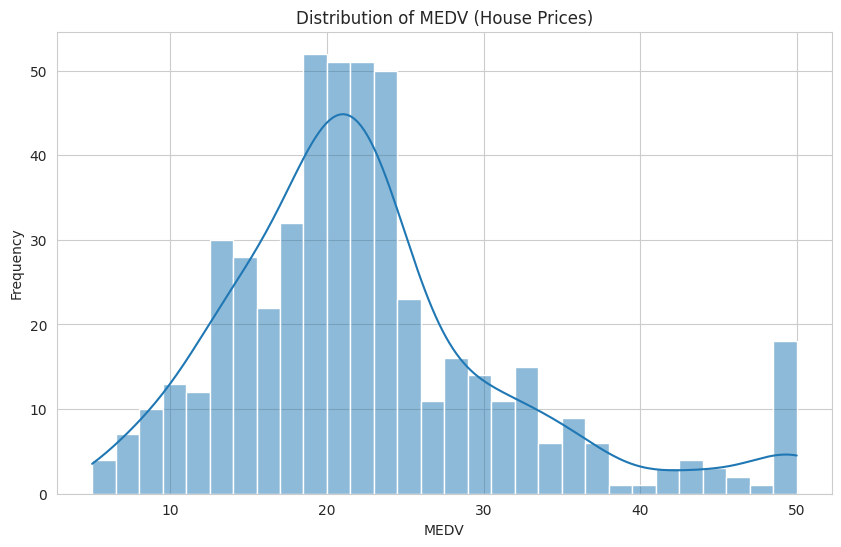

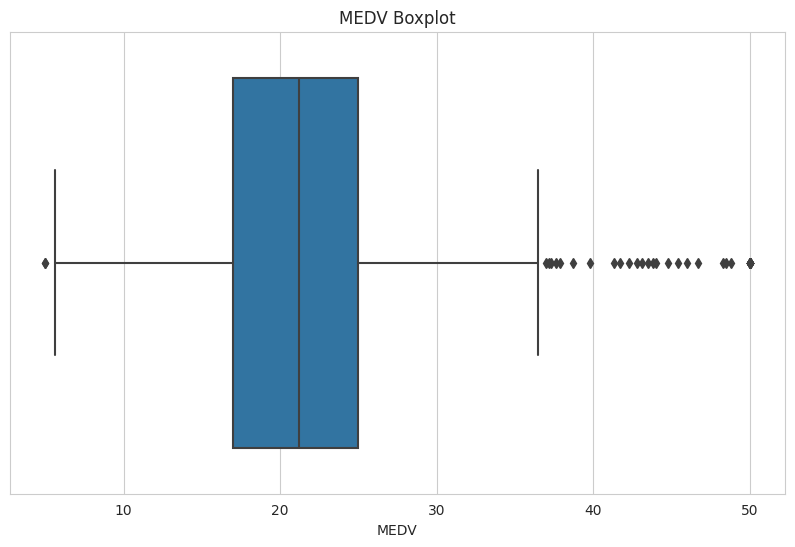

In [6]:

#Target (MEDV) Analysis


plt.figure()
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.boxplot(x=df["MEDV"])
plt.title("MEDV Boxplot")
plt.show()


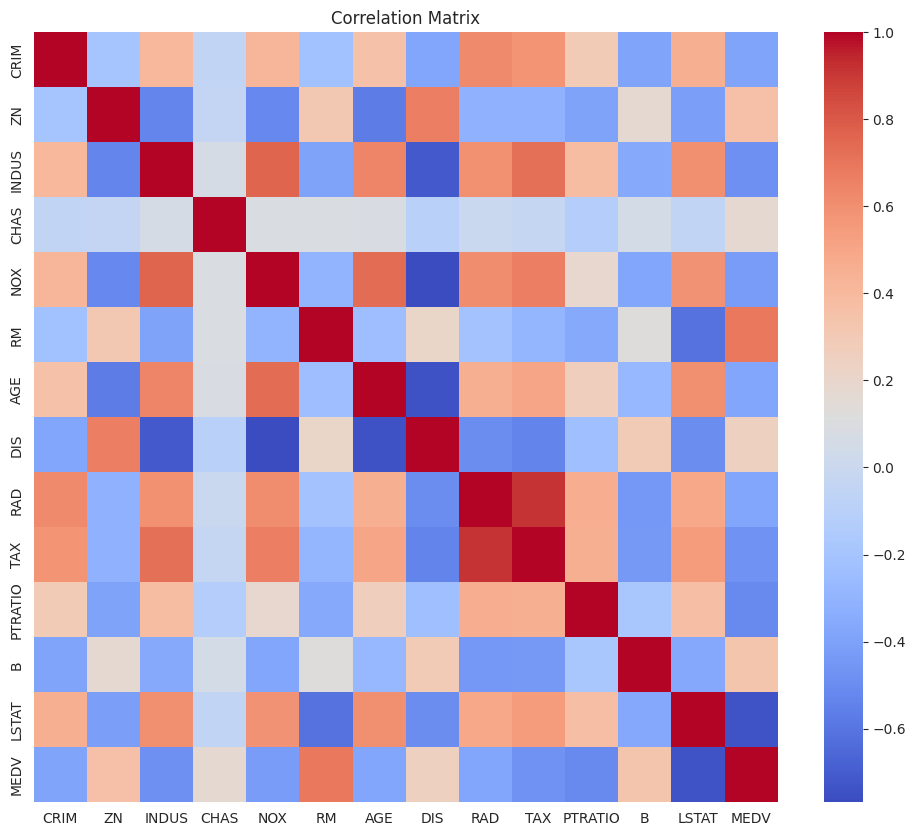


Correlation with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


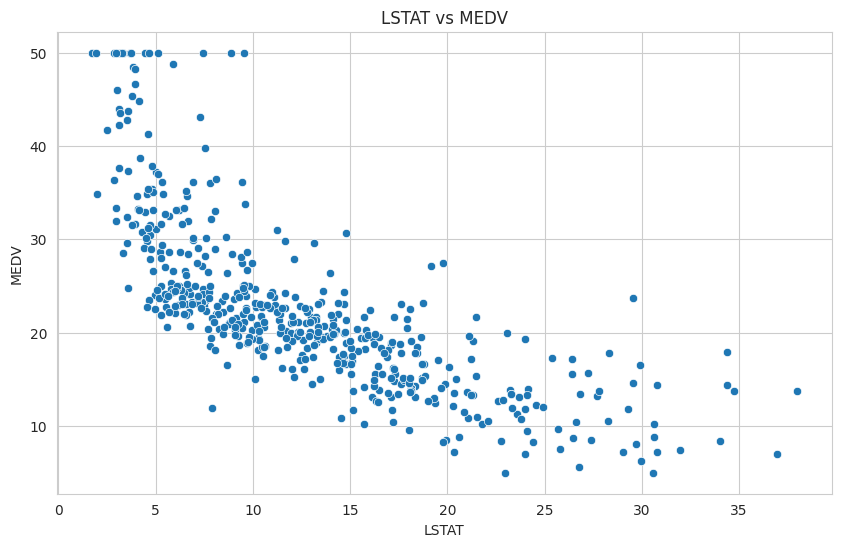

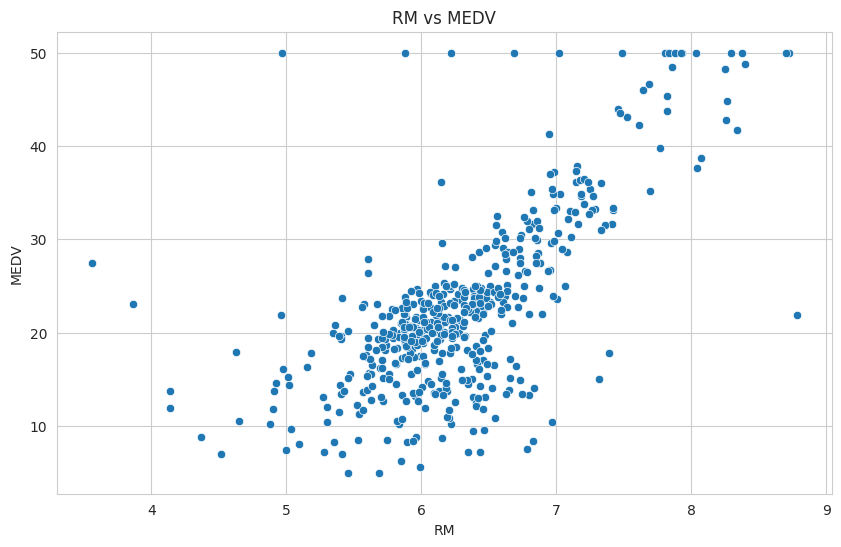

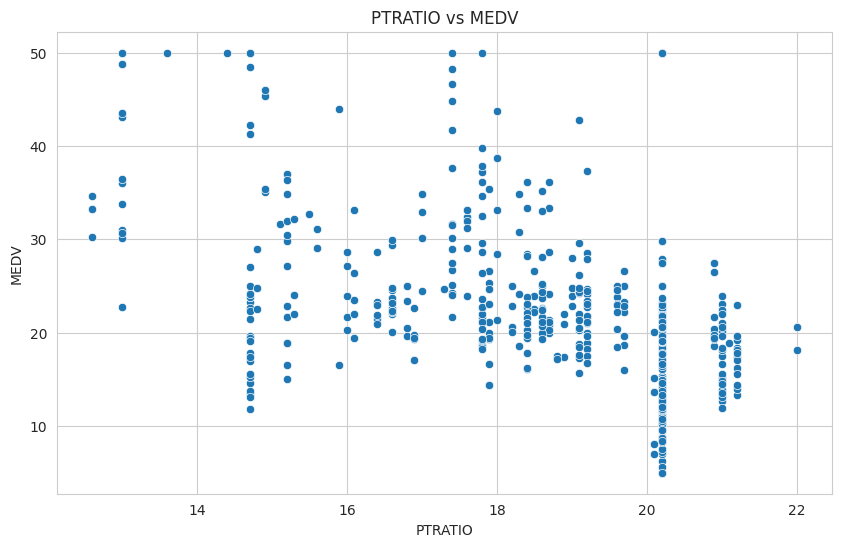

In [7]:

#Correlation Analysis


corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print("\nCorrelation with MEDV:")
print(corr["MEDV"].sort_values(ascending=False))

# Scatterplots for top correlated features
top_features = ["LSTAT", "RM", "PTRATIO"]

for feature in top_features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df["MEDV"])
    plt.title(f"{feature} vs MEDV")
    plt.show()


In [8]:

#Train-Test Split


X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (404, 13)
Test shape: (102, 13)


In [9]:

#Define Models


models = {}

models["LinearRegression"] = LinearRegression()

models["RidgeRegression"] = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

models["RandomForest"] = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

models["GradientBoosting"] = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

models["XGBoost"] = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror",
    random_state=42
)


In [10]:

#Train & Evaluate Models


results = []
predictions = {}

def evaluate(model_name, model, X_train, X_test, y_train, y_test):
    """Train a model and compute RMSE, MAE, R2."""
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    return rmse, mae, r2, preds

for name, model in models.items():
    rmse, mae, r2, preds = evaluate(name, model, X_train, X_test, y_train, y_test)
    predictions[name] = preds
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results).sort_values("RMSE")
print("\nModel Results:")
results_df



Model Results:


,Model,RMSE,MAE,R2
4,XGBoost,2.480103,1.755384,0.916124
3,GradientBoosting,2.564546,1.935334,0.910316
2,RandomForest,2.987748,2.077824,0.878274
0,LinearRegression,4.928602,3.189092,0.668759
1,RidgeRegression,4.930812,3.185724,0.668462


In [11]:

#Cross Validation for Best Model


best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=kfold, scoring="r2")

print("CV R2 Scores:", cv_scores)
print("Mean R2:", cv_scores.mean())
print("Std R2:", cv_scores.std())



Best Model: XGBoost
CV R2 Scores: [0.91768467 0.89725146 0.85820102 0.91972326 0.90862863]
Mean R2: 0.9002978099779583
Std R2: 0.022496548102645664


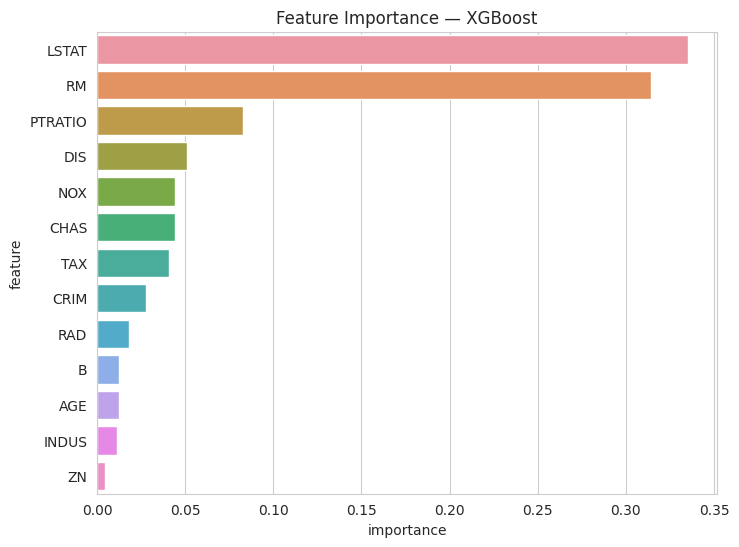

In [12]:

#Feature Importance


def plot_feature_importance(model, model_name, X):
    """Plot feature importance for tree-based models."""
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:
        print(f"No feature importance available for {model_name}")
        return

    fi = pd.DataFrame({
        "feature": X.columns,
        "importance": importance
    }).sort_values("importance", ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x="importance", y="feature", data=fi)
    plt.title(f"Feature Importance — {model_name}")
    plt.show()

best_model.fit(X_train, y_train)
plot_feature_importance(best_model, best_model_name, X_train)


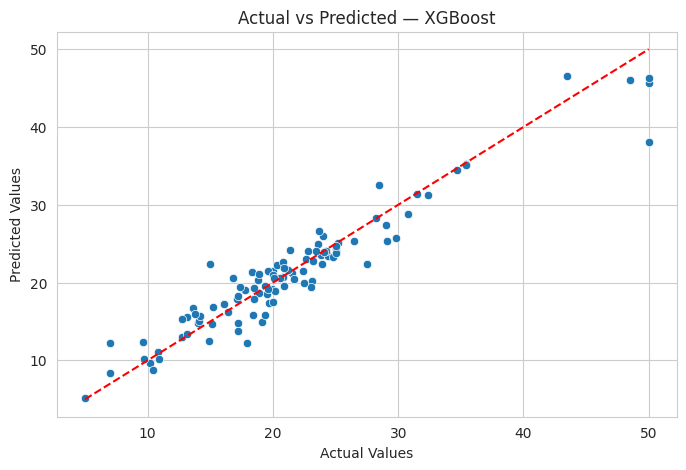

In [13]:

#Actual vs Predicted


best_preds = best_model.predict(X_test)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=best_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted — {best_model_name}")
plt.show()
